Model 1 with hugging face api

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader
from datasets import Dataset, DatasetDict
from transformers import TrainingArguments,Trainer,pipeline
from tensorflow.keras.preprocessing.text import Tokenizer


In [2]:
movie = pd.read_csv("C:/Users/Acer/Downloads/movie.csv")

In [3]:
movie.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


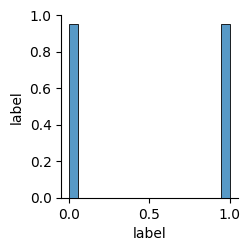

In [4]:
sns.pairplot(movie)

In [5]:
pipe = pipeline("text-classification", model="distilbert/distilbert-base-uncased-finetuned-sst-2-english")

In [6]:
def truncate_text(text, max_words):
    words = text.split()
    if len(words) <= max_words:
        return text
    truncated_words = words[:max_words]  # Truncate to the specified number of words
    truncated_text = ' '.join(truncated_words)  # Join words back into a single string
    return truncated_text

In [7]:
data =movie['text'].apply(lambda x: truncate_text(x, 300))

In [8]:
predictions = [pipe(text) for text in data.iloc[:500]]

In [9]:
print(predictions)

[[{'label': 'NEGATIVE', 'score': 0.9997420907020569}], [{'label': 'NEGATIVE', 'score': 0.9978891015052795}], [{'label': 'NEGATIVE', 'score': 0.9982742071151733}], [{'label': 'NEGATIVE', 'score': 0.999797523021698}], [{'label': 'NEGATIVE', 'score': 0.9400165677070618}], [{'label': 'POSITIVE', 'score': 0.9408488273620605}], [{'label': 'POSITIVE', 'score': 0.996920108795166}], [{'label': 'NEGATIVE', 'score': 0.9914008975028992}], [{'label': 'POSITIVE', 'score': 0.9982280135154724}], [{'label': 'POSITIVE', 'score': 0.9986273050308228}], [{'label': 'NEGATIVE', 'score': 0.8298906087875366}], [{'label': 'NEGATIVE', 'score': 0.9833393096923828}], [{'label': 'POSITIVE', 'score': 0.9995651841163635}], [{'label': 'NEGATIVE', 'score': 0.9995710253715515}], [{'label': 'NEGATIVE', 'score': 0.9629203677177429}], [{'label': 'POSITIVE', 'score': 0.998991072177887}], [{'label': 'POSITIVE', 'score': 0.9947516322135925}], [{'label': 'NEGATIVE', 'score': 0.9995036125183105}], [{'label': 'NEGATIVE', 'score'

In [10]:
predict = []
for k in range(len(predictions)):
  predict.append(1 if predictions[k][0]['label'] == 'POSITIVE' else 0)
  #predictions[k][0]['label']
#predict = [1 if predictions[0]['label'] == 'POSITIVE' else 0 for prediction in predictions]


In [11]:
print(predict)

[0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 

In [12]:
true_label = movie['label'][:500].tolist()

In [13]:
def compute_metrics(predictions, labels):
    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

In [14]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [15]:
compute_metrics(predict, true_label)

{'accuracy': 0.898,
 'precision': 0.8988714075938745,
 'recall': 0.898,
 'f1': 0.8978242022248917}

Model 2

In [16]:
data_james =movie['text'].apply(lambda x: truncate_text(x, 300))

In [17]:
pipe_james = pipeline("text-classification", model="JamesH/Movie_review_sentiment_analysis_model")

In [18]:
predictions_james = [pipe_james(text) for text in data_james.iloc[:500]]

In [19]:
print(predictions_james)

[[{'label': 'NEG', 'score': 0.9546070098876953}], [{'label': 'NEG', 'score': 0.893781840801239}], [{'label': 'NEG', 'score': 0.9702375531196594}], [{'label': 'NEG', 'score': 0.9275022745132446}], [{'label': 'POS', 'score': 0.9775837659835815}], [{'label': 'NEG', 'score': 0.8580195307731628}], [{'label': 'POS', 'score': 0.98969966173172}], [{'label': 'NEG', 'score': 0.9821420907974243}], [{'label': 'POS', 'score': 0.9893149137496948}], [{'label': 'POS', 'score': 0.9877378940582275}], [{'label': 'NEG', 'score': 0.738585889339447}], [{'label': 'NEG', 'score': 0.5809998512268066}], [{'label': 'POS', 'score': 0.9841114282608032}], [{'label': 'NEG', 'score': 0.9648776650428772}], [{'label': 'NEG', 'score': 0.9562328457832336}], [{'label': 'POS', 'score': 0.9881500005722046}], [{'label': 'POS', 'score': 0.9841061234474182}], [{'label': 'NEG', 'score': 0.9771451950073242}], [{'label': 'NEG', 'score': 0.9844017624855042}], [{'label': 'NEG', 'score': 0.9499959945678711}], [{'label': 'POS', 'scor

In [20]:
predict_james = []
for k in range(len(predictions_james)):
  predict_james.append(1 if predictions_james[k][0]['label'] == 'POSITIVE' else 0)

In [21]:
true_labels = movie['label'][:500].tolist()

In [22]:
compute_metrics(predict_james, true_labels)

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'accuracy': 0.52,
 'precision': 0.27040000000000003,
 'recall': 0.52,
 'f1': 0.35578947368421054}

Model 1 with custom pipeline

In [23]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

In [24]:
def truncation(text, tokenizer, max_length=200):
    encoded_text = tokenizer(text, truncation=True, max_length=max_length, return_tensors='pt')
    return tokenizer.decode(encoded_text['input_ids'][0], skip_special_tokens=True)

In [25]:
tokenizer_dsbert = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased-finetuned-sst-2-english")
model_dsbert = AutoModelForSequenceClassification.from_pretrained("distilbert/distilbert-base-uncased-finetuned-sst-2-english")
sent_pipe_distilbert = pipeline('text-classification', model=model_dsbert, tokenizer=tokenizer_dsbert, truncation=True, max_length=512)

In [26]:
small_text = movie['text'][:1000].apply(lambda x: truncation(x, tokenizer_dsbert))

In [27]:
predictions_dsbert = [sent_pipe_distilbert(text)[0]['label'] for text in small_text]

In [28]:
predictions_distilbert = [1 if label == 'POSITIVE' else 0 for label in predictions_dsbert]

In [29]:
true_label_dsbert= movie['label'][:1000].tolist()

In [30]:
metrics_distilbert_pretrained = compute_metrics(predictions_distilbert, true_label_dsbert)
print("DistilBert Pre-trained Metrics: ", metrics_distilbert_pretrained)

DistilBert Pre-trained Metrics:  {'accuracy': 0.867, 'precision': 0.8674045963949369, 'recall': 0.867, 'f1': 0.8668176847179333}


Model 1 fine tuning

In [31]:
X,y = train_test_split(movie,test_size = 0.2, random_state = 69)
X_sample = X.sample(n = 1000,random_state = 69)
y_sample = y.sample(n = 200,random_state = 69)

In [32]:
X_data = Dataset.from_pandas(X_sample)
y_data = Dataset.from_pandas(y_sample)

In [33]:
main_data = DatasetDict({
    'train': X_data,
    'test': y_data
})

In [34]:
def tokeniziation(review, tokenizer):
    encoded_text = tokenizer(review['text'], truncation=True, padding='max_length',max_length=200)
    return encoded_text

In [35]:
tokenized_data = main_data.map(lambda x: tokeniziation(x, tokenizer_dsbert), batched=True)

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

In [36]:
def compute_metrics_fine(eval_pred):
    metric = load_metric("accuracy")
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [37]:
pip install accelerate -U

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [56]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate = 3e-5,
    weight_decay=0.01,
    evaluation_strategy="epoch"
    )

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\transformers\training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [57]:
trainer = Trainer(
    model=model_dsbert,
    args=training_args,
    train_dataset=tokenized_data['train'],
    eval_dataset=tokenized_data['test'],
    compute_metrics=compute_metrics_fine
)

In [58]:
from datasets import load_metric

In [59]:
trainer.train()

  0%|          | 0/189 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\datasets\load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


{'eval_loss': 1.2512491941452026, 'eval_accuracy': 0.805, 'eval_runtime': 10.6949, 'eval_samples_per_second': 18.701, 'eval_steps_per_second': 1.216, 'epoch': 1.0}


  0%|          | 0/13 [00:00<?, ?it/s]

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\datasets\load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


{'eval_loss': 1.4178787469863892, 'eval_accuracy': 0.815, 'eval_runtime': 10.5046, 'eval_samples_per_second': 19.039, 'eval_steps_per_second': 1.238, 'epoch': 2.0}


  0%|          | 0/13 [00:00<?, ?it/s]

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\datasets\load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


{'eval_loss': 1.535650372505188, 'eval_accuracy': 0.81, 'eval_runtime': 10.7124, 'eval_samples_per_second': 18.67, 'eval_steps_per_second': 1.214, 'epoch': 3.0}
{'train_runtime': 469.2939, 'train_samples_per_second': 6.393, 'train_steps_per_second': 0.403, 'train_loss': 0.027055094481776, 'epoch': 3.0}


TrainOutput(global_step=189, training_loss=0.027055094481776, metrics={'train_runtime': 469.2939, 'train_samples_per_second': 6.393, 'train_steps_per_second': 0.403, 'total_flos': 155235232800000.0, 'train_loss': 0.027055094481776, 'epoch': 3.0})

In [60]:
metrics = trainer.evaluate()
print(metrics)

  0%|          | 0/13 [00:00<?, ?it/s]

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\datasets\load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


{'eval_loss': 1.535650372505188, 'eval_accuracy': 0.81, 'eval_runtime': 10.2063, 'eval_samples_per_second': 19.596, 'eval_steps_per_second': 1.274, 'epoch': 3.0}


model 2 with custom pipeline and then fine tuning

In [43]:
tokenizer_james = AutoTokenizer.from_pretrained("JamesH/Movie_review_sentiment_analysis_model")
model_james = AutoModelForSequenceClassification.from_pretrained("JamesH/Movie_review_sentiment_analysis_model")
sent_pipe_james = pipeline('text-classification', model=model_james, tokenizer=tokenizer_james, truncation=True, max_length=512)

In [44]:
small_text_james = movie['text'][:1000].apply(lambda x: truncation(x, tokenizer_james))

In [45]:
predictions_james = [sent_pipe_james(text)[0]['label'] for text in small_text_james]

In [46]:
predictions_james_num = [1 if label == 'POSITIVE' else 0 for label in predictions_james]

In [47]:
metrics_james_pretrained = compute_metrics(predictions_james_num, true_label_dsbert)
print("James Pre-trained Metrics: ", metrics_james_pretrained)

James Pre-trained Metrics:  {'accuracy': 0.522, 'precision': 0.27248400000000006, 'recall': 0.522, 'f1': 0.3580604467805519}


C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


fine tuning 2nd model

In [48]:
tokenized_data_james = main_data.map(lambda x: tokeniziation(x, tokenizer_james), batched=True)

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

In [49]:
trainer_james = Trainer(
    model=model_james,
    args=training_args,
    train_dataset=tokenized_data_james['train'],
    eval_dataset=tokenized_data_james['test'],
    compute_metrics=compute_metrics_fine
)

In [50]:
trainer_james.train()

  0%|          | 0/189 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\datasets\load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


{'eval_loss': 0.36187148094177246, 'eval_accuracy': 0.895, 'eval_runtime': 24.1099, 'eval_samples_per_second': 8.295, 'eval_steps_per_second': 0.539, 'epoch': 1.0}


  0%|          | 0/13 [00:00<?, ?it/s]

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\datasets\load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


{'eval_loss': 0.42379772663116455, 'eval_accuracy': 0.89, 'eval_runtime': 24.7209, 'eval_samples_per_second': 8.09, 'eval_steps_per_second': 0.526, 'epoch': 2.0}


  0%|          | 0/13 [00:00<?, ?it/s]

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\datasets\load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


{'eval_loss': 0.48442450165748596, 'eval_accuracy': 0.885, 'eval_runtime': 25.0138, 'eval_samples_per_second': 7.996, 'eval_steps_per_second': 0.52, 'epoch': 3.0}
{'train_runtime': 1335.9152, 'train_samples_per_second': 2.246, 'train_steps_per_second': 0.141, 'train_loss': 0.17187736147925967, 'epoch': 3.0}


TrainOutput(global_step=189, training_loss=0.17187736147925967, metrics={'train_runtime': 1335.9152, 'train_samples_per_second': 2.246, 'train_steps_per_second': 0.141, 'total_flos': 308338797600000.0, 'train_loss': 0.17187736147925967, 'epoch': 3.0})

In [51]:
metrics_james = trainer_james.evaluate()
print(metrics_james)

  0%|          | 0/13 [00:00<?, ?it/s]

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\datasets\load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


{'eval_loss': 0.48442450165748596, 'eval_accuracy': 0.885, 'eval_runtime': 25.0367, 'eval_samples_per_second': 7.988, 'eval_steps_per_second': 0.519, 'epoch': 3.0}
